In [1]:
import pandas as pd

In [2]:
#1. Read CSV 
humidity_df = pd.read_csv("DHT22 log-humidity.csv")
temperature_df = pd.read_csv("DHT22 log-temperature.csv")

In [3]:
#2. Rename Columns 

humidity_df.columns = ['time', 'humidity']
temperature_df.columns = ['time', 'temperature']

In [4]:
 #3. Convert time to datetime object
humidity_df['time'] = pd.to_datetime(humidity_df['time'], errors='coerce')
temperature_df['time'] = pd.to_datetime(temperature_df['time'], errors='coerce')

# 4. Merge on 'time' column (inner join to keep common timestamps)
combined_df = pd.merge(humidity_df, temperature_df, on='time', how='inner')

# 5. Drop rows with missing or malformed values
combined_df = combined_df.dropna()

# 6. View first few rows
print(combined_df.head())

                                 time     humidity  temperature
0 2025-07-29 10:43:34.679978945+00:00  3312.300049         14.9
1 2025-07-29 10:43:54.964641063+00:00  3304.000000         15.0
2 2025-07-29 10:48:57.049727360+00:00  3307.399902         16.1
3 2025-07-29 11:02:48.156906375+00:00    33.099998         28.6
4 2025-07-29 11:03:13.326482330+00:00    33.700001         28.5


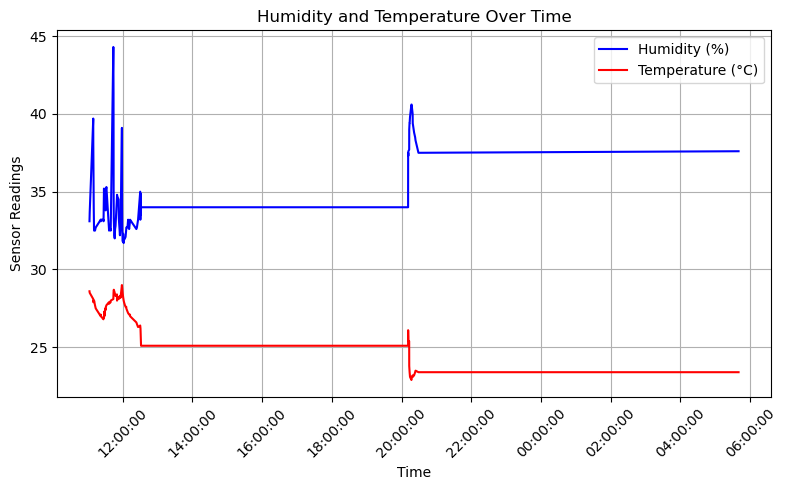

In [5]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
combined_df['humidity'] = combined_df['humidity'].round(2)
combined_df['temperature'] = combined_df['temperature'].round(2)
combined_df = combined_df[combined_df['humidity'] <= 50]


# Combined plot with time formatting
plt.figure(figsize=(8,5))
plt.plot(combined_df['time'], combined_df['humidity'], label='Humidity (%)', color='blue')
plt.plot(combined_df['time'], combined_df['temperature'], label='Temperature (°C)', color='red')

# Format x-axis to show only HH:MM
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.title('Humidity and Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Sensor Readings')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

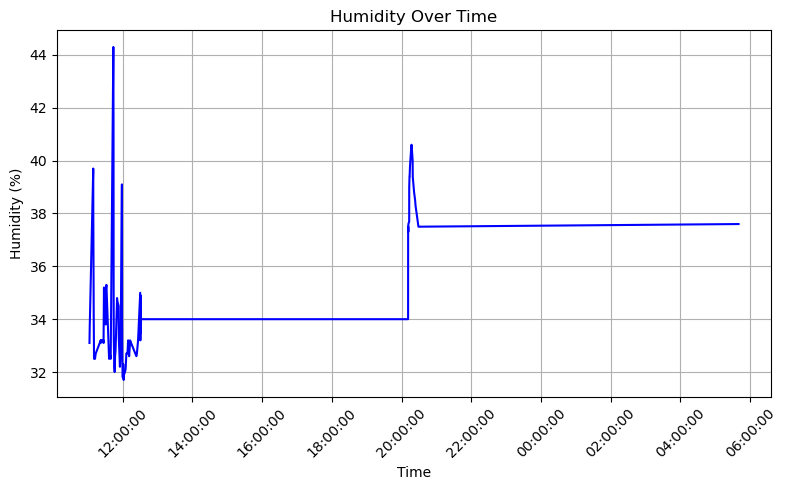

In [6]:
#Humidity over Time

plt.figure(figsize=(8, 5))
plt.plot(combined_df['time'], combined_df['humidity'], color='blue')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.title('Humidity Over Time')
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

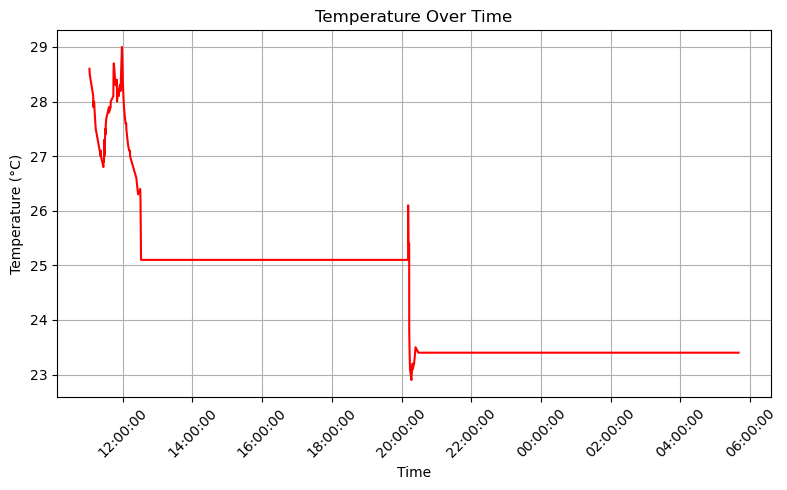

In [7]:
#Temperature Over Time

plt.figure(figsize=(8, 5))
plt.plot(combined_df['time'], combined_df['temperature'], color='red')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()